<a href="https://colab.research.google.com/github/rz-pb/Bioinformatics-Codes/blob/main/Double_Digest_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Double Digest Problem

<p align = "justify"><i>Double Digest mapping</i> is a restriction mapping technique that is even simpler (experimentally) than a partial digest but uses two different restriction enzymes. In this approach, biologists digest DNA in such a way that only fragments between <u>consecutive</u> sites are formed. One way to construct a double digest map is to measure the fragment lengths (but not the order) from a complete digestion of the DNA by each of the two enzymes singly, and then by the two enzymes applied together. The problem of determining the positions of the cuts from fragment length data is known as the <i>Double Digest problem</i>, or <b>DDP</b>.</p>

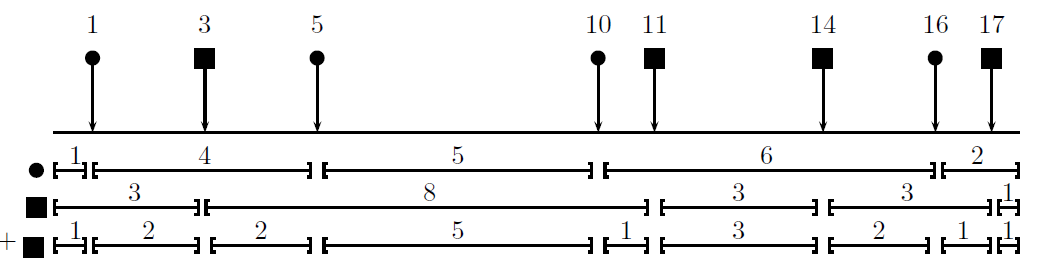



In [ ]:
import itertools

In [ ]:
# Fragment lengths' lists

# Enzyme A applied 
DA = [6, 5, 4, 1, 2]

# Enzyme B applied
DB = [3, 8, 3, 1, 3]

# Both Enzymes A and B applied
DC = [1, 2, 2, 5, 1, 3, 2, 1, 1]

## Preliminary Functions 

In [ ]:
# Functon for constructing a fragment length list based on restriction enzyme
# cutting sites 

def Consecutive_Difference(A) :
  A = list(A)
  A.sort()
  Cons_Diff = []
  for i in range (1,len(A)) :
    Cons_Diff.append(A[i] - A[i-1])

  return Cons_Diff


In [ ]:
# Function for reconstructing the restriction enzyme cutting sites based on
# an ordered list of fragment lenghs

def Reconst_BasedOn_Ordered_Diff(DA) :
  A = []
  A.append(0)
  
  temp = 0
  for i in range(0,len(DA)) :
    temp += DA[i]
    A.append(temp)

  return A


## Brute Force Approach

In [ ]:
# Function to DDP using a brute-force approach. It returns the location of 
# restriction enzyme sites (if any) for A and B, otherwise it returns a pair of
# empy lists indicating "not found!"

def BruteForce_DDP(DA,DB,DC) :

  DA_permlist = list(list(elem) for  elem in itertools.permutations(DA))
  DB_permlist = list(list(elem) for  elem in itertools.permutations(DB))
  
  for DA_perm in DA_permlist :
    A_candidate = Reconst_BasedOn_Ordered_Diff(DA_perm)
    for DB_perm in DB_permlist :
      B_candidate = Reconst_BasedOn_Ordered_Diff(DB_perm)
      
      A_candidate_set = set(A_candidate)
      B_candidate_Set = set(B_candidate)
      A_union_B = list(A_candidate_set.union(B_candidate))

      if DC == Consecutive_Difference(A_union_B) : 
        return A_candidate , B_candidate

  return [] , []


In [ ]:
BruteForce_DDP(DA,DB,DC)

([0, 1, 5, 10, 16, 18], [0, 3, 11, 14, 17, 18])